# Exercise 2.4 Random Forest

## Index
### Imprort Librairies and Data
### Data Wrangling
### Reshaping
### Split Data
### Hyperparameter Optimization
### Random Forest Model all stations 1990
### Random Forest Dusseldorf

## Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
path = r'C:/Users/Jack Bartman/OneDrive/CareerFoundry/Machine Learning'

In [5]:
# Import cleaned weather observations data

X = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'weather_clean.csv'), index_col = False)

In [7]:
# Import predictions data

answers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [9]:
X.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0            10.9                     1               0.81             1.0195   
1            10.1                     6               0.84             1.0172   
2             9.9                     6               0.77             1.0179   
3            10.6                     8               0.93             1.0268   
4             6.0                     8               0.99             1.0286   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                       0.88                    0.00                7.0   
1                       0.25                    0.00                0.0   
2                       0.67                    0.00                3.5   
3                       0.25                    0.00                0.0   
4                       0.25                    0.06                0.0   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0                 3.7               -0.9                7.9   
1                 2.9                2.2                4.4   
2                 3.1               -0.5                6.4   
3                 2.0               -2.0                3.0   
4                 2.0                0.7                2.8   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   
1                     4               0.67              1.017   
2                     4               0.67              1.017   
3                     4               0.67              1.017   
4                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   
1                       0.18                    0.31                0.0   
2                       0.30                    0.00                0.6   
3                       0.19                    0.00                0.0   
4                       0.19                    0.00                0.0   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0                 2.4               -0.4                5.1   
1                 2.3                1.4                3.1   
2                 2.7                1.7                5.3   
3                 2.0                0.4                4.4   
4                 2.5                1.1                5.3   

   DEBILT_cloud_cover  DEBILT_humidity  DEBILT_pressure  \
0                   7             0.85           1.0032   
1                   8             0.90           1.0056   
2                   6             0.92           1.0165   
3                   8             0.95           1.0265   
4                   6             0.90           1.0243   

   DEBILT_global_radiation  DEBILT_precipitation  DEBILT_sunshine  \
0                     0.07                  0.25              0.0   
1                     0.14              

In [11]:
X.shape

(22950, 135)

In [13]:
answers.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [15]:
answers.shape

(22950, 16)

## Data Wrangling

In [17]:
#copy DATE into climate data
X['DATE']=answers['DATE'].values

In [19]:
X.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0            10.9                     1               0.81             1.0195   
1            10.1                     6               0.84             1.0172   
2             9.9                     6               0.77             1.0179   
3            10.6                     8               0.93             1.0268   
4             6.0                     8               0.99             1.0286   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                       0.88                    0.00                7.0   
1                       0.25                    0.00                0.0   
2                       0.67                    0.00                3.5   
3                       0.25                    0.00                0.0   
4                       0.25                    0.06                0.0   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0                 3.7               -0.9                7.9   
1                 2.9                2.2                4.4   
2                 3.1               -0.5                6.4   
3                 2.0               -2.0                3.0   
4                 2.0                0.7                2.8   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   
1                     4               0.67              1.017   
2                     4               0.67              1.017   
3                     4               0.67              1.017   
4                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   
1                       0.18                    0.31                0.0   
2                       0.30                    0.00                0.6   
3                       0.19                    0.00                0.0   
4                       0.19                    0.00                0.0   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0                 2.4               -0.4                5.1   
1                 2.3                1.4                3.1   
2                 2.7                1.7                5.3   
3                 2.0                0.4                4.4   
4                 2.5                1.1                5.3   

   DEBILT_cloud_cover  DEBILT_humidity  DEBILT_pressure  \
0                   7             0.85           1.0032   
1                   8             0.90           1.0056   
2                   6             0.92           1.0165   
3                   8             0.95           1.0265   
4                   6             0.90           1.0243   

   DEBILT_global_radiation  DEBILT_precipitation  DEBILT_sunshine  \
0                     0.07                  0.25              0.0   
1                     0.14              

In [21]:
# reduce dataset to 1990's
dfdecade = X[X['DATE'].astype(str).str.contains('199')] 
dfdecade

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958                  0            0.83          1.0217   
10959                  2            0.84          1.0238   
10960                  8            0.89          1.0231   
10961                  2            0.77          1.0265   
10962                  7            0.81          1.0286   
...                  ...             ...             ...   
14605                  7            0.74          0.9953   
14606                  8            0.88          0.9956   
14607                  8            0.84          1.0162   
14608                  7            0.80          1.0276   
14609                  7            0.86          1.0252   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959                    0.48                 0.00             2.3   
10960                    0.20                 0.00             0.0   
10961                    0.54                 0.00             5.6   
10962                    0.23                 0.04             0.2   
...                       ...                  ...             ...   
14605                    0.28                 1.93             1.0   
14606                    0.13                 1.22             0.0   
14607                    0.21                 0.11             0.1   
14608                    0.26                 0.01             0.5   
14609                    0.21                 0.09             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
10958             -2.1            -3.6             1.2                     2   
10959             -1.8            -3.9             1.7                     8   
10960             -2.2            -4.2             0.4                     5   
10961             -0.7            -3.1             2.2                     5   
10962              0.0            -3.1             2.6                     0   
...                ...             ...             ...                   ...   
14605              5.0             1.5             6.5                     5   
14606              2.4             1.0             3.4                     8   
14607              1.8             1.0             2.7                     6   
14608              1.1            -0.3             3.4                     3   
14609              0.7            -0.7             1.9                     7   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
10958               0.86             1.0246                       0.19   
10959               0.83             1.0235                       0.18   
10960               0.88             1.0241                       0.18   
10961               0.86             1.0327                       0.39   
10962               0.62             1.0338                       1.06   
...                  ...                ...                        ...   
14605               0.88             0.9957                       0.24   
14606               0.85             0.9873                       0.24   
14607               0.80             1.0074                       0.24   
14608               0.87             1.0240                       0.61   
14609               0.93             1.0237                       0.24   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
10958                    0.00                5.3                -1.3   
10959                    0.03                0.0                -0.9   
10960                    0.11                0.0                -0.8   
10961                    0.00                0.0                -3.1   
10962                    0.00                7.7                -5.7   
...                       ...                ...                 ...   
14605                    0.37                0.0                 4.1   
14606              

In [23]:
# reduce answers to 1990's
answers_decade = answers[answers['DATE'].astype(str).str.contains('199')] 
answers_decade

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
10958  19900101                       0                          0   
10959  19900102                       0                          0   
10960  19900103                       0                          0   
10961  19900104                       0                          0   
10962  19900105                       0                          0   
...         ...                     ...                        ...   
14605  19991227                       0                          0   
14606  19991228                       0                          0   
14607  19991229                       0                          0   
14608  19991230                       0                          0   
14609  19991231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
10958                          0                        0   
10959                          0                        0   
10960                          0                        0   
10961                          0                        0   
10962                          0                        0   
...                          ...                      ...   
14605                          0                        0   
14606                          0                        0   
14607                          0                        0   
14608                          0                        0   
14609                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
10958                            0                          0   
10959                            0                          0   
10960                            0                          0   
10961                            0                          0   
10962                            0                          0   
...                            ...                        ...   
14605                            0                          0   
14606                            0                          0   
14607                            0                          0   
14608                            0                          0   
14609                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
10958                        0                           0   
10959                        0                           0   
10960                        0                           0   
10961                        0                           0   
10962                        0                           0   
...                        ...                         ...   
14605                        0                           0   
14606                        0                           0   
14607                        0                           0   
14608                        0                           0   
14609                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
10958                            0                        0   
10959                            0                        0   
10960                            0                        0   
10961                            0                        0   
10962                            0                        0   
...                            ...                      ...   
14605                            0                        0   
14606                            0                        0   
14607                            0                        0   
14608                            0                        0   
14609                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
10958                          0                      0   
10959                          0    

In [25]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [27]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [29]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  dfdecade.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  dfdecade[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
SONNBLICK: 32868 entries
MUNCHENB: 32868 entries
BELGRADE: 32868 entries
DUSSELDORF: 32868 entries
LJUBLJANA: 32868 entries
MAASTRICHT: 32868 entries
MADRID: 32868 entries
DEBILT: 32868 entries
STOCKHOLM: 32868 entries
BASEL: 32868 entries
KASSEL: 32868 entries
HEATHROW: 32868 entries
BUDAPEST: 32868 entries
VALENTIA: 32868 entries
OSLO: 32868 entries


### there are the same number of entries for each station

In [31]:
# Drop unnecessary columns

dfdecade.drop(['DATE'], axis=1, inplace=True)

In [33]:
dfdecade.shape

(3652, 135)

In [35]:
answers_decade.drop(columns = 'DATE', inplace = True)

In [37]:
answers_decade.shape

(3652, 15)

## Reshaping

In [39]:
X = dfdecade

In [41]:
y = answers_decade

In [43]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [45]:
X.shape

(3652, 135)

In [47]:
y.shape

(3652, 15)

## Data Split

In [49]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [51]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


## Hyperparameter Optimization

### grid search

In [54]:
# Create a RF classifier

clf = RandomForestClassifier()

In [56]:
grid_space = {
    'max_depth': [3, 10, None],  # Focus on a smaller range
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_features': [15, 50],  # Focus on fewer values
    'min_samples_leaf': [1, 2],  # Smaller range
    'min_samples_split': [2, 3]  # Avoid using 1 (invalid in sklearn)
}

In [61]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Search took 1.5107743819554647 minutes


In [63]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
Best GRID search score is: 0.6319824753559694


### random search

In [66]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(15, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [68]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [70]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 8.11984494527181 minutes


In [72]:
# Random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 70, 'max_features': 69, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 310}
Best RANDOM search score is: 0.6305220883534137


In [74]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
Best GRID search score is: 0.6319824753559694
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 70, 'max_features': 69, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 310}
Best RANDOM search score is: 0.6305220883534137


In [ ]:
## The Grid search yeilded a slightly better score, will use those hyperparameters to optimize the random forest

## Random Forest

In [96]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 50, max_features=50, min_samples_leaf=1, min_samples_split=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_features=50, min_samples_split=3, n_estimators=50)

In [98]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6670317634173056


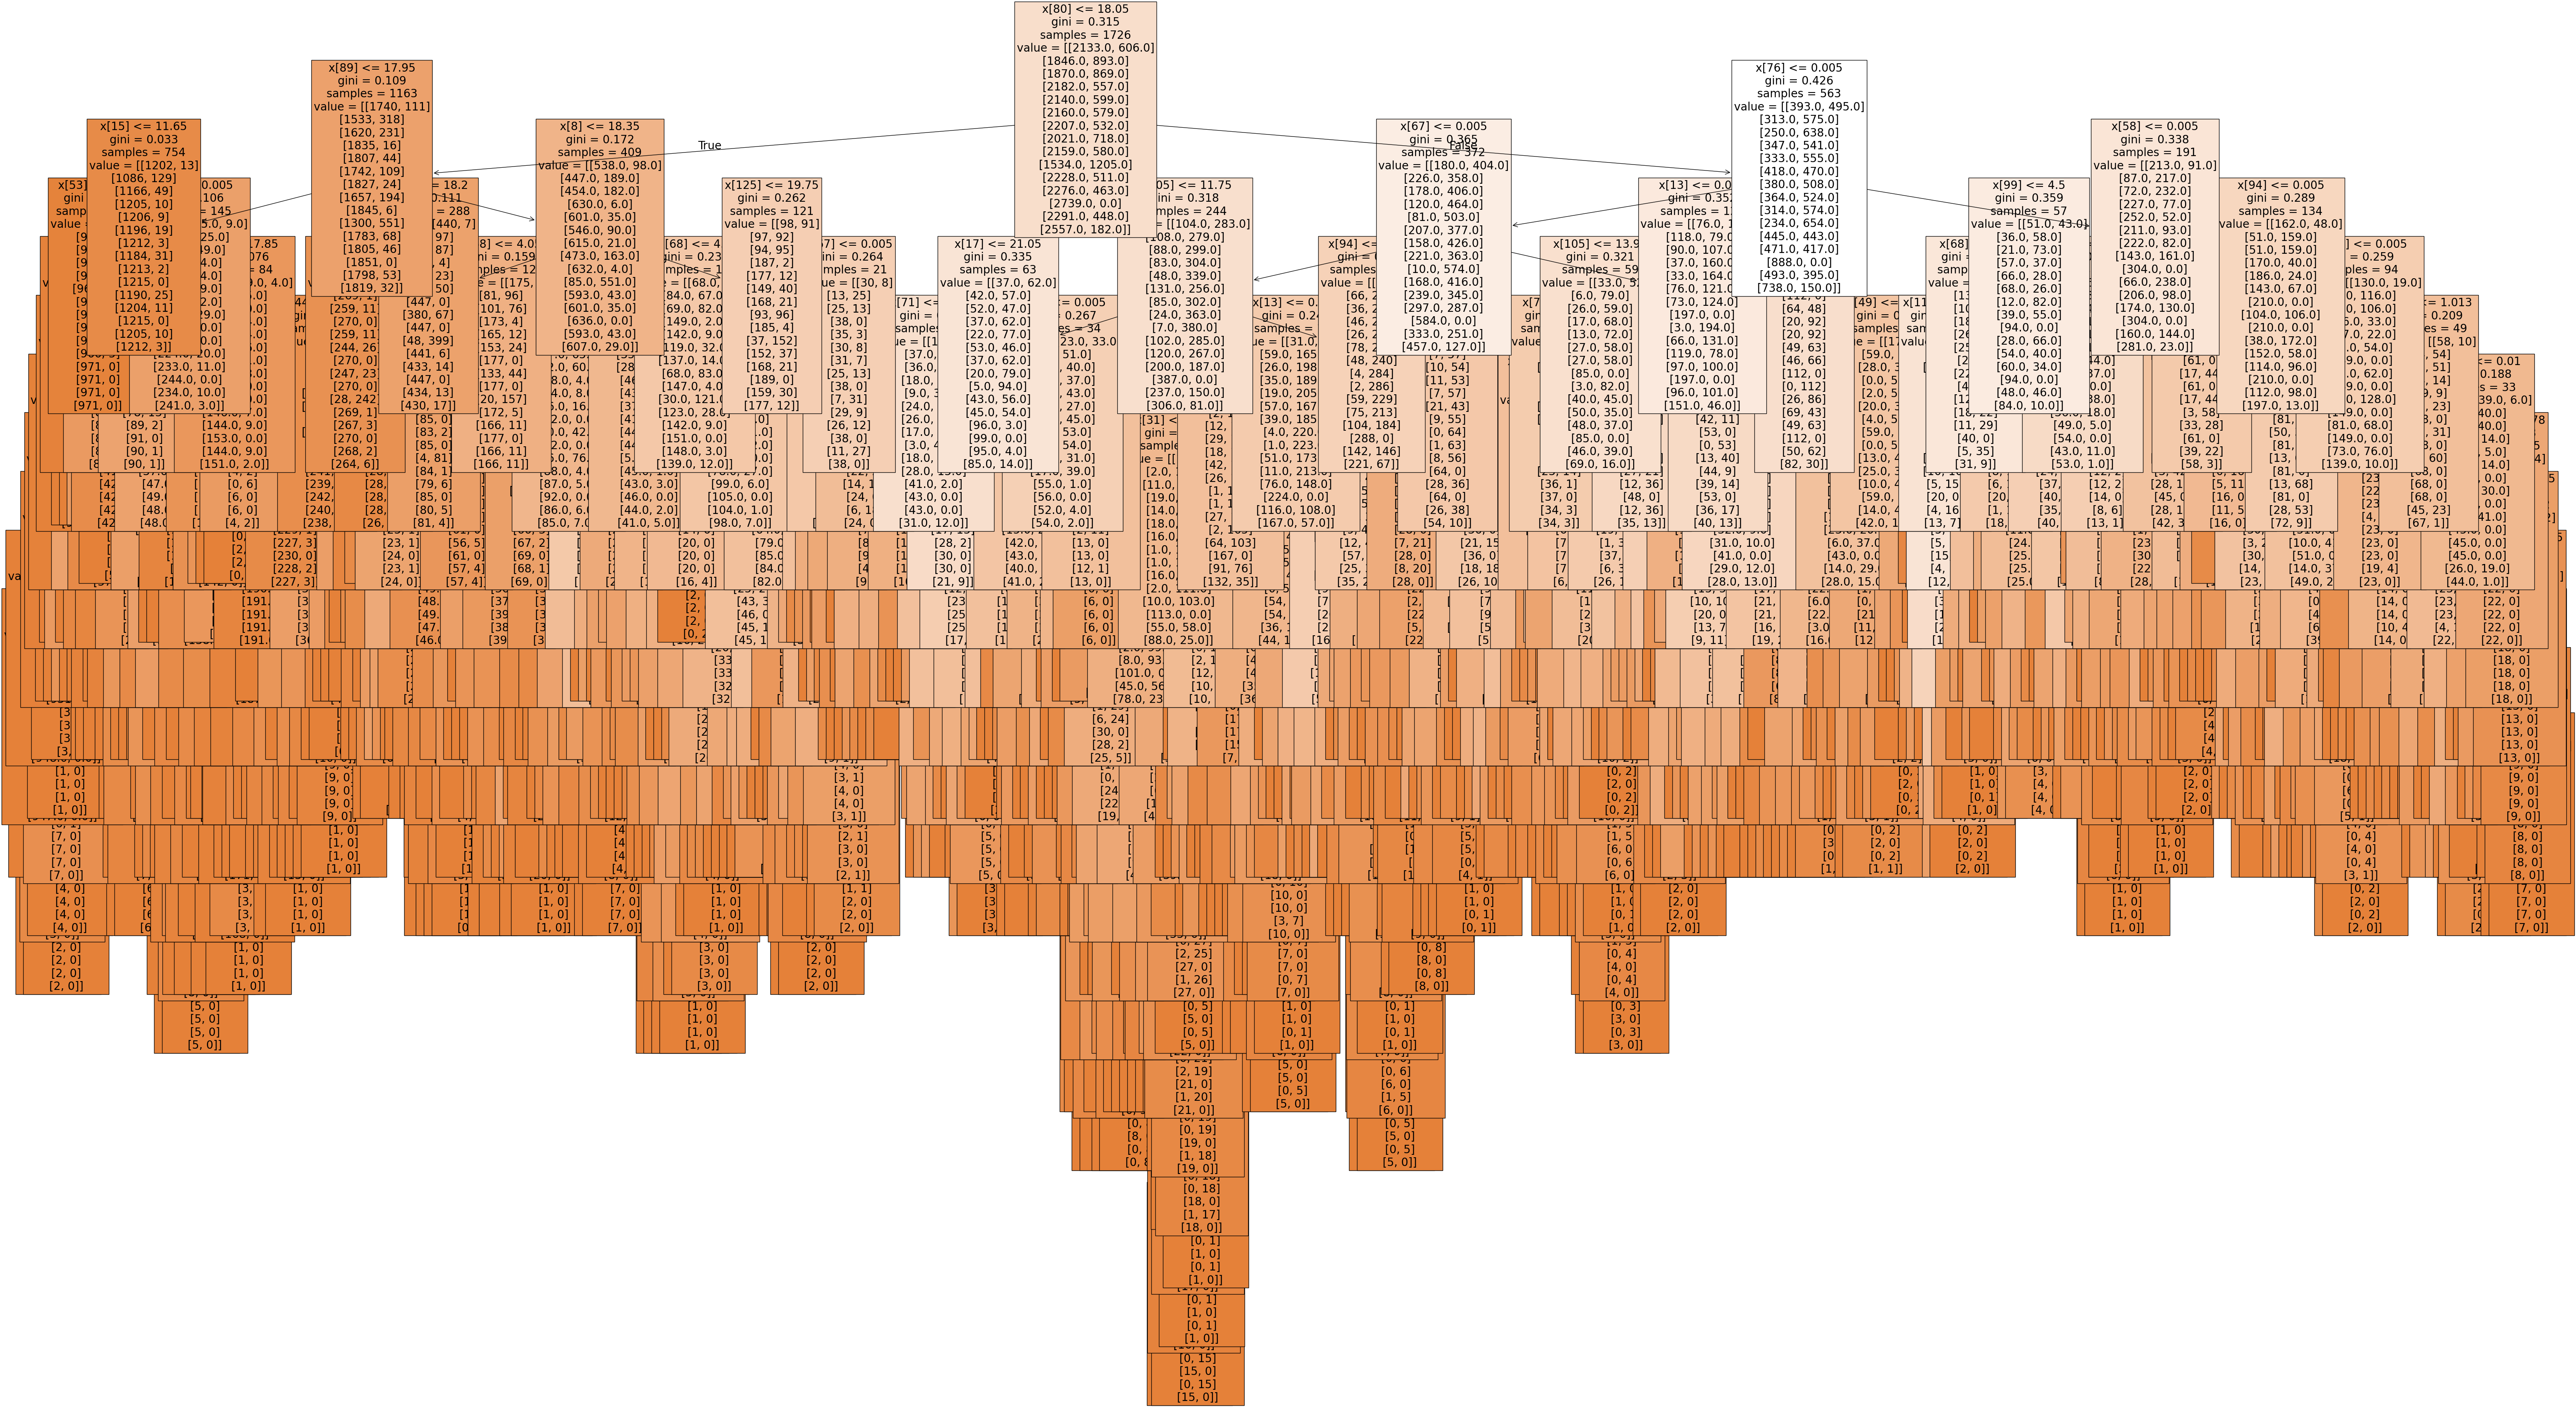

In [100]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [102]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([0.00145914, 0.00213152, 0.00156813, 0.00211323, 0.01985845,
       0.00402746, 0.00214644, 0.00170893, 0.03968946, 0.00227169,
       0.00253837, 0.00199529, 0.00187253, 0.0326964 , 0.00299744,
       0.00287977, 0.00167422, 0.0117633 , 0.00155627, 0.00189568,
       0.00209891, 0.00200863, 0.0224205 , 0.00269394, 0.00538489,
       0.00166494, 0.01676806, 0.00146804, 0.00165598, 0.00262204,
       0.00210736, 0.01746522, 0.00222   , 0.001778  , 0.00126672,
       0.07451543, 0.00358261, 0.00135296, 0.00189139, 0.00168722,
       0.02832088, 0.00708013, 0.0143538 , 0.00154733, 0.09087015,
       0.00100792, 0.00230427, 0.00227068, 0.00211698, 0.0120142 ,
       0.00273629, 0.00229884, 0.00168145, 0.00811036, 0.00121913,
       0.00219891, 0.0015229 , 0.00221742, 0.00727063, 0.00207845,
       0.01514846, 0.00154348, 0.04358697, 0.00154908, 0.00212159,
       0.00189936, 0.00229048, 0.0346166 , 0.00285223, 0.00426605,
       0.00174266, 0.01502148, 0.00205377, 0.00152825, 0.00147

In [104]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00145914, 0.00213152, 0.00156813, 0.00211323, 0.01985845,
         0.00402746, 0.00214644, 0.00170893, 0.03968946],
        [0.00227169, 0.00253837, 0.00199529, 0.00187253, 0.0326964 ,
         0.00299744, 0.00287977, 0.00167422, 0.0117633 ],
        [0.00155627, 0.00189568, 0.00209891, 0.00200863, 0.0224205 ,
         0.00269394, 0.00538489, 0.00166494, 0.01676806],
        [0.00146804, 0.00165598, 0.00262204, 0.00210736, 0.01746522,
         0.00222   , 0.001778  , 0.00126672, 0.07451543],
        [0.00358261, 0.00135296, 0.00189139, 0.00168722, 0.02832088,
         0.00708013, 0.0143538 , 0.00154733, 0.09087015],
        [0.00100792, 0.00230427, 0.00227068, 0.00211698, 0.0120142 ,
         0.00273629, 0.00229884, 0.00168145, 0.00811036],
        [0.00121913, 0.00219891, 0.0015229 , 0.00221742, 0.00727063,
         0.00207845, 0.01514846, 0.00154348, 0.04358697],
        [0.00154908, 0.00212159, 0.00189936, 0.00229048, 0.0346166 ,
         0.00285223, 0.00426605, 0.0017426

In [106]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.07470276, 0.060689  , 0.05649182, 0.10509881, 0.15068646,
       0.03454099, 0.07678635, 0.06635954, 0.13521142, 0.08686557,
       0.04372652, 0.04226676, 0.01539396, 0.03014932, 0.02103071])

In [108]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [110]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

LJUBLJANA     0.150686
STOCKHOLM     0.135211
DUSSELDORF    0.105099
BASEL         0.086866
MADRID        0.076786
SONNBLICK     0.074703
DEBILT        0.066360
MUNCHENB      0.060689
BELGRADE      0.056492
KASSEL        0.043727
HEATHROW      0.042267
MAASTRICHT    0.034541
VALENTIA      0.030149
OSLO          0.021031
BUDAPEST      0.015394
dtype: float64

In [112]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['SONNBLICK', 'MUNCHENB', 'BELGRADE', 'DUSSELDORF', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'DEBILT', 'STOCKHOLM', 'BASEL', 'KASSEL', 'HEATHROW', 'BUDAPEST', 'VALENTIA', 'OSLO']


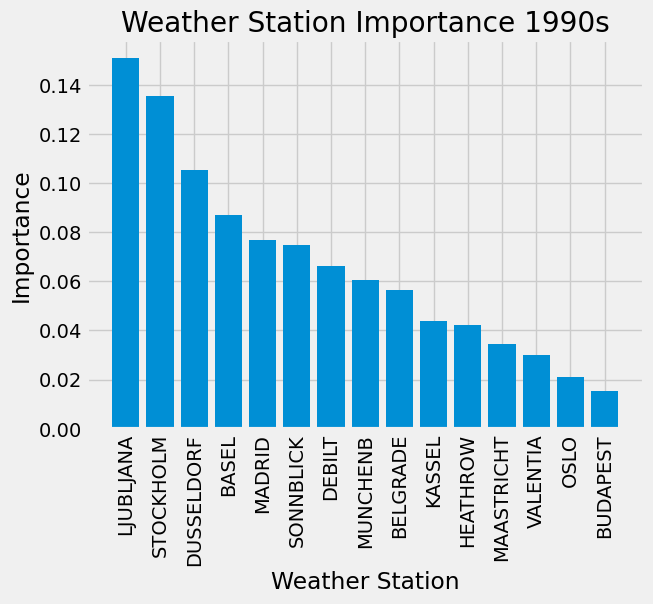

In [114]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 1990s')
plt.show()

## Random Forest Dusseldorf

### Reduce to Dusseldorf only

In [119]:
# Import cleaned weather observations data

X = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'weather_clean.csv'), index_col = False)

In [121]:
# list of the columns containing "Dusseldorf"
dusseldorf_list = list(x for x in X.columns if x.find('DUSSELDORF') >=0)
dusseldorf_list

['DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max']

In [123]:
# DF of those columns
df_dusseldorf=X[dusseldorf_list]
df_dusseldorf

DUSSELDORF_cloud_cover  DUSSELDORF_humidity  DUSSELDORF_pressure  \
0                           8                 0.83               1.0161   
1                           8                 0.89               1.0161   
2                           7                 0.95               1.0161   
3                           8                 0.86               1.0161   
4                           7                 0.92               1.0161   
...                       ...                  ...                  ...   
22945                       8                 0.75               1.0214   
22946                       7                 0.71               1.0186   
22947                       8                 0.73               1.0196   
22948                       7                 0.73               1.0176   
22949                       8                 0.78               1.0184   

       DUSSELDORF_global_radiation  DUSSELDORF_precipitation  \
0                             0.12                      0.08   
1                             0.18                      0.66   
2                             0.12                      0.07   
3                             0.12                      0.02   
4                             0.12                      0.62   
...                            ...                       ...   
22945                         1.13                      0.20   
22946                         1.13                      0.20   
22947                         1.13                      0.20   
22948                         1.13                      0.20   
22949                         1.13                      0.20   

       DUSSELDORF_sunshine  DUSSELDORF_temp_mean  DUSSELDORF_temp_min  \
0                      0.0                  10.0                  7.0   
1                      0.5                   8.2                  7.4   
2                      0.0                   7.1                  6.9   
3                      0.0                   6.8                  3.6   
4                      0.0                   7.7                  6.2   
...                    ...                   ...                  ...   
22945                  6.4                  17.8                 13.6   
22946                  4.9                  19.4                 15.4   
22947                  4.0                  18.2                 13.4   
22948                  6.9                  16.7                 11.9   
22949                  1.7                  15.2                  9.7   

       DUSSELDORF_temp_max  
0                     11.5  
1                     11.0  
2                      9.1  
3                      8.0  
4                     11.0  
...                    ...  
22945                 21.4  
22946                 23.9  
22947                 22.0  
22948                 21.1  
22949                 19.5  

[22950 rows x 9 columns]

In [125]:
# DF of Dusseldorf answers
answers_dusseldorf = answers['DUSSELDORF_pleasant_weather']
answers_dusseldorf

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: DUSSELDORF_pleasant_weather, Length: 22950, dtype: int64

In [127]:
df_dusseldorf.shape

(22950, 9)

In [129]:
answers_dusseldorf.shape

(22950,)

### reshaping

In [137]:
X2=df_dusseldorf

In [139]:
y2=answers_dusseldorf

In [141]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [143]:
X.shape

(22950, 9)

In [145]:
y.shape

(22950,)

### data split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [149]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [151]:
X_test

array([[ 3.    ,  0.74  ,  1.0161, ..., 12.6   ,  6.9   , 19.5   ],
       [ 7.    ,  0.56  ,  1.0102, ...,  2.2   ,  0.7   ,  5.4   ],
       [ 8.    ,  0.78  ,  1.0077, ..., 18.2   , 17.3   , 20.8   ],
       ...,
       [ 1.    ,  0.8   ,  1.0133, ..., 11.3   ,  4.    , 20.8   ],
       [ 7.    ,  0.77  ,  1.0259, ...,  7.4   ,  6.2   ,  9.1   ],
       [ 8.    ,  0.88  ,  1.0196, ..., 11.4   ,  7.4   , 14.3   ]])

In [153]:
X_train

array([[  3.    ,   0.63  ,   1.0153, ...,  18.8   ,   9.9   ,  24.    ],
       [  3.    ,   0.75  ,   1.0172, ...,  -3.6   ,  -6.3   ,  -1.2   ],
       [  4.    ,   0.91  ,   1.0108, ...,  -5.4   , -11.9   ,  -2.6   ],
       ...,
       [  8.    ,   0.84  ,   1.0098, ...,   8.6   ,   5.1   ,  10.2   ],
       [  7.    ,   0.77  ,   1.0161, ...,  11.6   ,   8.2   ,  15.3   ],
       [  2.    ,   0.64  ,   1.0243, ...,   7.6   ,   1.    ,  14.    ]])

In [155]:
y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [157]:
y_train

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### hyperparameter optimization

### grid search

In [164]:
# Create a RF classifier

clf= RandomForestClassifier()

In [166]:
grid_space = {
    'max_depth': [3, 10, None],  # Focus on a smaller range
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_features': [15, 50],  # Focus on fewer values
    'min_samples_leaf': [1, 2],  # Smaller range
    'min_samples_split': [2, 3]  # Avoid using 1 (invalid in sklearn)
}

In [168]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Search took 0.2546412388483683 minutes


In [171]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best GRID search score is: 1.0


### random search

In [175]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)}

In [177]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [179]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 2.943211793899536 minutes


In [181]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 410}
Best RANDOM search score is: 1.0


In [183]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 410}
Best RANDOM search score is: 1.0


### random forest

In [ ]:
# both grid and random hyperparameter searches had a score of 1. Will use Grid to be consistent with previous random tree 

In [187]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 50, max_features=15, min_samples_leaf=1, min_samples_split=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_features=15, n_estimators=50)

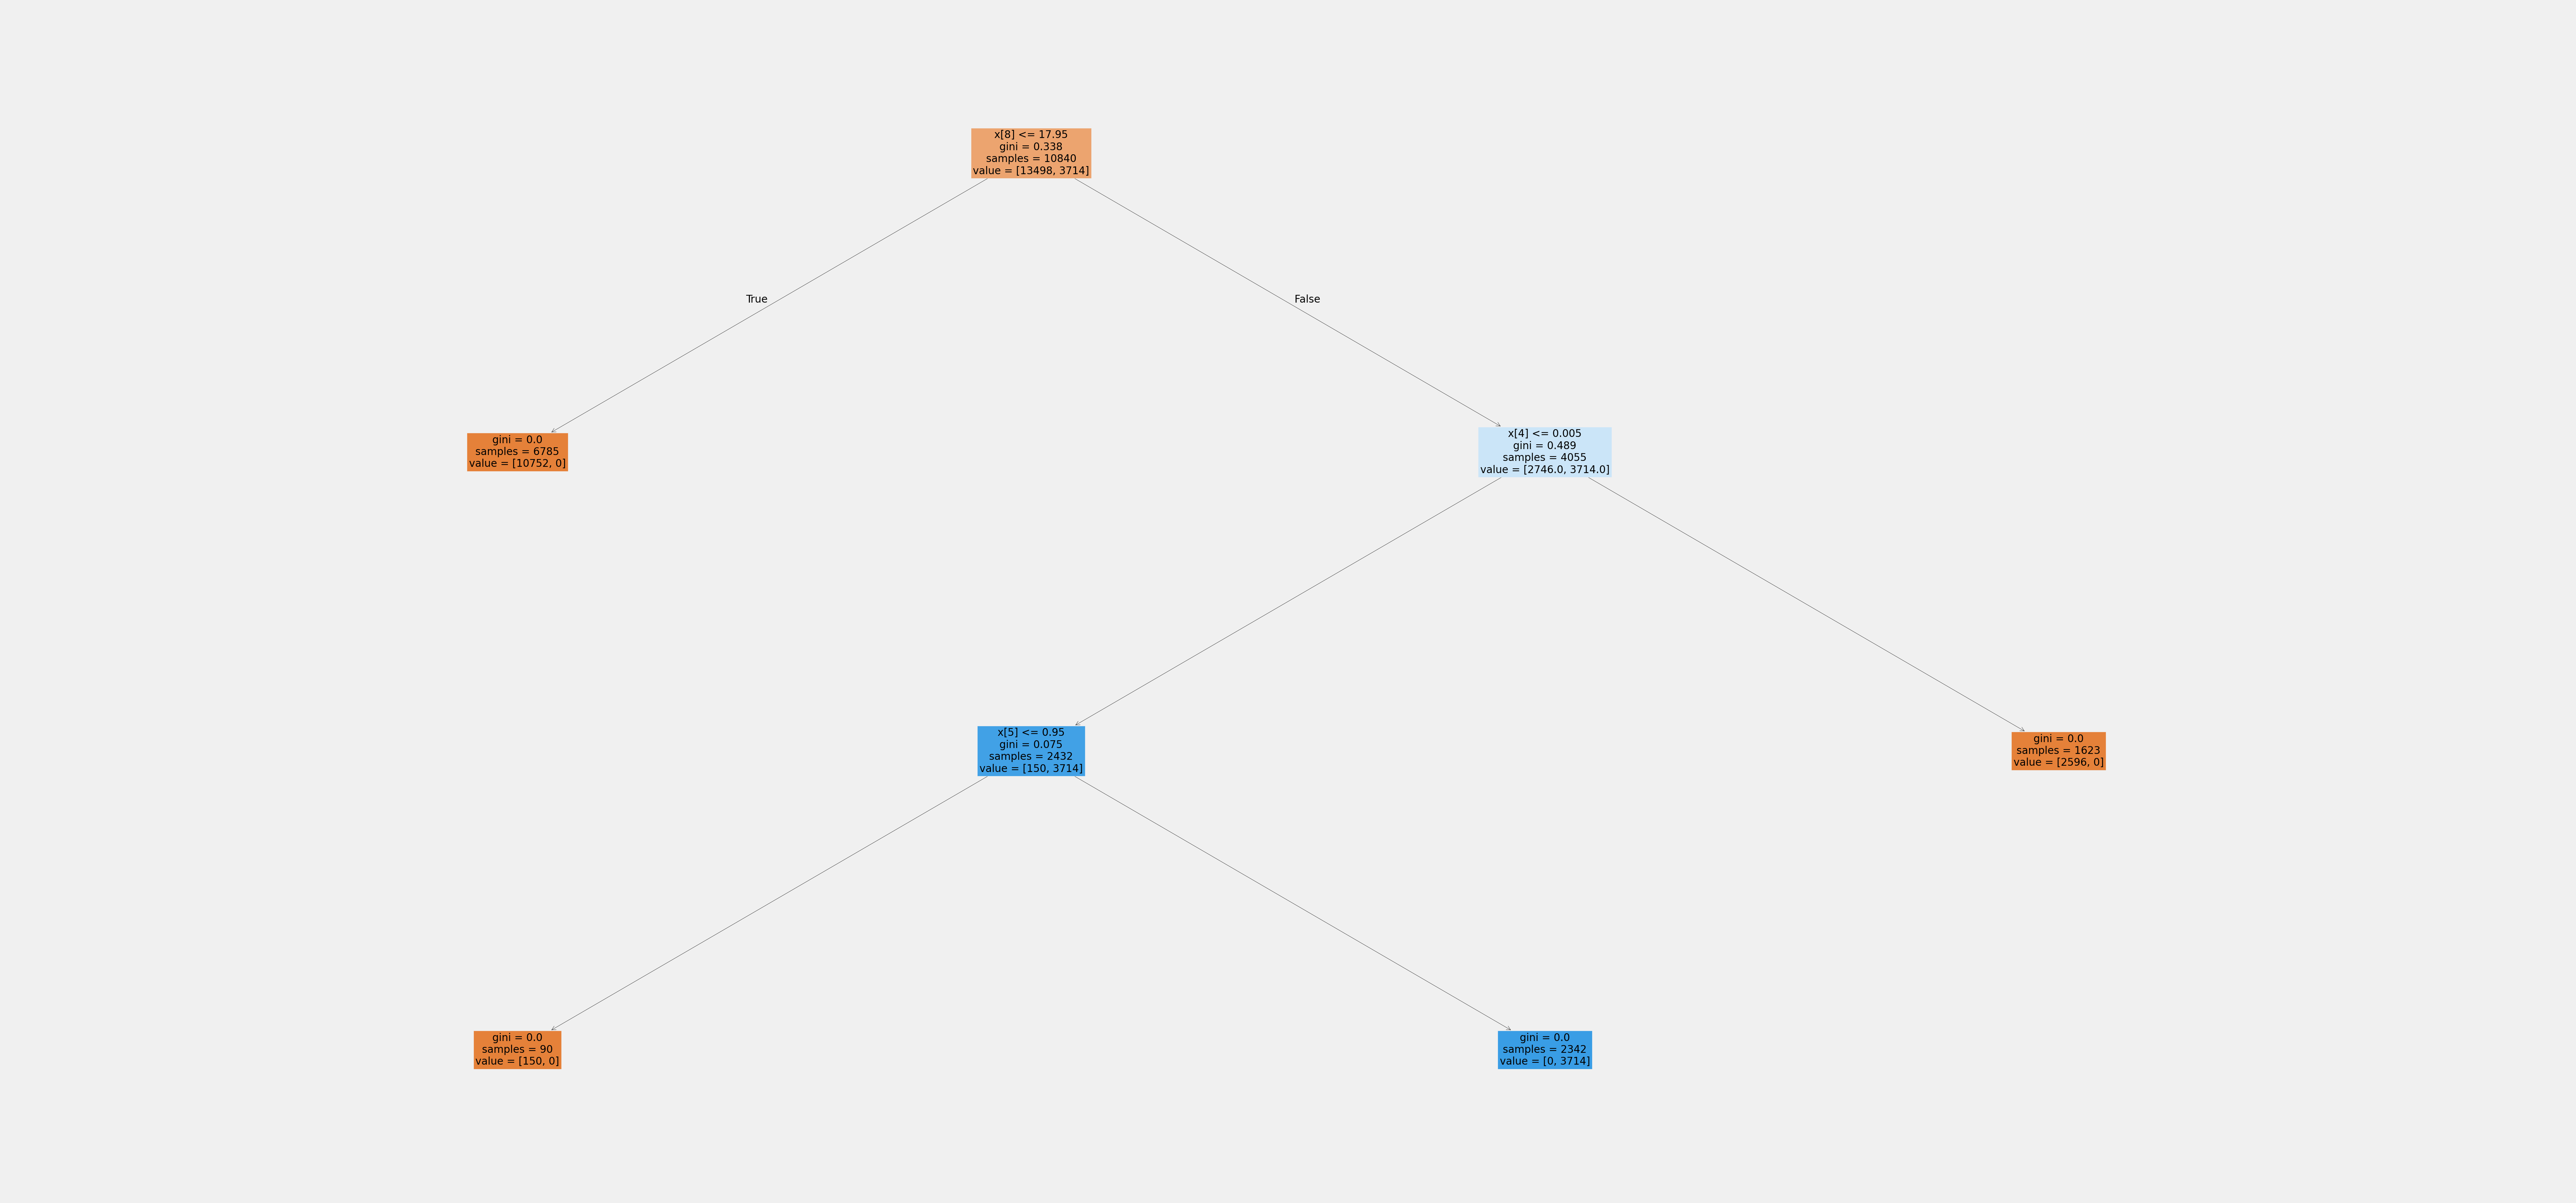

In [189]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);
plt.show()

In [193]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.55760445e-05,
       4.89543458e-01, 5.05761399e-02, 0.00000000e+00, 0.00000000e+00,
       4.59804826e-01])

In [195]:
# Create a list of weather features

wx_list = [feature.replace('DUSSELDORF_', '') for feature in dusseldorf_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [197]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.000000
humidity            0.000000
pressure            0.000000
global_radiation    0.000076
precipitation       0.489543
sunshine            0.050576
temp_mean           0.000000
temp_min            0.000000
temp_max            0.459805
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


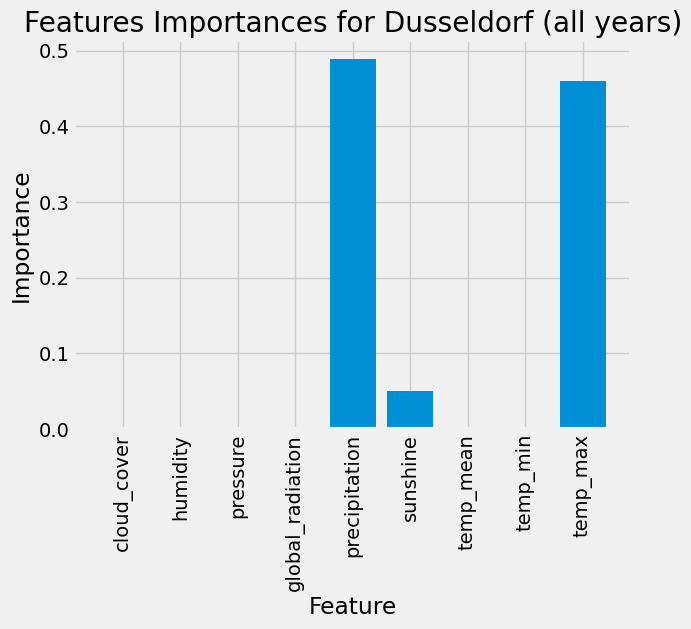

In [199]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Dusseldorf (all years)');
plt.show()